#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns
plt.style.use('fivethirtyeight')
%matplotlib inline

#### Load data

In [2]:
df = pd.read_csv('./data/mbb_teams_games_sr.csv')

C:\Users\Admin\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (4,7,16,21,58) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df.head())

                                game_id  season  status coverage neutral_site  \
0  4069f80e-04f0-4f69-a563-86014bbe95a0    2015  closed     full          NaN   
1  7160a0e0-bbc3-46ad-afc6-e4e6b5b90a51    2015  closed     full          NaN   
2  320ccf7a-8a32-4ce6-a561-10687985c6a6    2015  closed     full          NaN   
3  1a689aee-fec2-49df-822d-993e2826744b    2017  closed     full        False   
4  6314105c-8456-4b35-bfbf-1ec04749ff09    2017  closed     full        False   

  scheduled_date                 gametime conference_game tournament  \
0     2015-12-03  2015-12-03 03:00:00 UTC             NaN        NaN   
1     2016-01-17  2016-01-17 02:00:00 UTC             NaN        NaN   
2     2015-12-22  2015-12-22 20:00:00 UTC             NaN        NaN   
3     2017-12-10  2017-12-10 00:00:00 UTC           False        NaN   
4     2017-12-09  2017-12-09 21:00:00 UTC           False        NaN   

  tournament_type           ...            opp_fast_break_pts  \
0             N

In [4]:
# drop columns we don't need
df.drop(['game_id', 'status', 'coverage', 'logo_large', 'logo_medium', 'logo_small', 'possession_arrow', 'venue_id', 'team_id', 'league_id', 'conf_id', 'conf_name', 'division_name', 'opp_id', 'opp_league_id', 'opp_league_name', 'opp_conf_id', 'opp_conf_name', 'opp_division_id', 'opp_division_name', 'opp_logo_large', 'opp_logo_medium', 'opp_logo_small',], axis=1, inplace=True)


In [5]:
df.dtypes

season                          int64
neutral_site                   object
scheduled_date                 object
gametime                       object
conference_game                object
tournament                     object
tournament_type                object
tournament_round               object
tournament_game_no             object
attendance                    float64
lead_changes                  float64
times_tied                    float64
periods                       float64
venue_city                     object
venue_state                    object
venue_address                  object
venue_zip                      object
venue_country                  object
venue_name                     object
venue_capacity                float64
home_team                        bool
name                           object
market                         object
alias                          object
league_name                    object
league_alias                   object
conf_alias  

In [6]:
df.describe(include='all')

,season,neutral_site,scheduled_date,gametime,conference_game,tournament,tournament_type,tournament_round,tournament_game_no,attendance,...,opp_fast_break_pts,opp_second_chance_pts,opp_team_turnovers,opp_points_off_turnovers,opp_team_rebounds,opp_flagrant_fouls,opp_player_tech_fouls,opp_team_tech_fouls,opp_coach_tech_fouls,created
count,59610.000000,23956,59610,59610,35942,4320,4320,4310,1306,49068.000000,...,48620.000000,50230.000000,50088.000000,50255.000000,50597.000000,51591.000000,51591.000000,24099.000000,22448.000000,59610
unique,NaN,2,717,8374,2,2,68,25,17,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,220
top,NaN,False,2016-11-12,2016-11-12 00:00:00 UTC,True,Conference,CIT,First Round,Game 1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-02-20 16:39:59 UTC
freq,NaN,21250,338,112,18314,2896,262,1110,342,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5508
mean,2015.005435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5301.714356,...,6.113040,10.374955,0.328482,13.978947,3.148072,0.017193,0.091159,0.035105,0.026372,NaN
std,1.415258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5779.653509,...,5.065954,5.439629,0.684656,6.389495,2.062462,0.133522,0.411793,0.191562,0.167048,NaN
min,2013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,-2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2014.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1411.000000,...,2.000000,7.000000,0.000000,10.000000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,2015.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3238.000000,...,5.000000,10.000000,0.000000,13.000000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,2016.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7461.000000,...,8.000000,14.000000,1.000000,18.000000,4.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [7]:
df.columns

Index(['season', 'neutral_site', 'scheduled_date', 'gametime',
       'conference_game', 'tournament', 'tournament_type', 'tournament_round',
       'tournament_game_no', 'attendance',
       ...
       'opp_fast_break_pts', 'opp_second_chance_pts', 'opp_team_turnovers',
       'opp_points_off_turnovers', 'opp_team_rebounds', 'opp_flagrant_fouls',
       'opp_player_tech_fouls', 'opp_team_tech_fouls', 'opp_coach_tech_fouls',
       'created'],
      dtype='object', length=109)

In [8]:
#columns with nan values
df.loc[:, df.isna().any()]
count_nan = len(df) - df.count()
count_nan

season                            0
neutral_site                  35654
scheduled_date                    0
gametime                          0
conference_game               23668
tournament                    55290
tournament_type               55290
tournament_round              55300
tournament_game_no            58304
attendance                    10542
lead_changes                   8676
times_tied                     8748
periods                          62
venue_city                       30
venue_state                     508
venue_address                   888
venue_zip                       656
venue_country                    30
venue_name                       30
venue_capacity                  294
home_team                         0
name                              1
market                            0
alias                            66
league_name                      72
league_alias                     72
conf_alias                       74
division_id                 

#### Separate into an opposition dataframe and home dataframe

In [9]:
list(df.columns.values)

['season',
 'neutral_site',
 'scheduled_date',
 'gametime',
 'conference_game',
 'tournament',
 'tournament_type',
 'tournament_round',
 'tournament_game_no',
 'attendance',
 'lead_changes',
 'times_tied',
 'periods',
 'venue_city',
 'venue_state',
 'venue_address',
 'venue_zip',
 'venue_country',
 'venue_name',
 'venue_capacity',
 'home_team',
 'name',
 'market',
 'alias',
 'league_name',
 'league_alias',
 'conf_alias',
 'division_id',
 'division_alias',
 'opp_name',
 'opp_market',
 'opp_alias',
 'opp_league_alias',
 'opp_conf_alias',
 'opp_division_alias',
 'win',
 'points_game',
 'minutes',
 'field_goals_made',
 'field_goals_att',
 'field_goals_pct',
 'three_points_made',
 'three_points_att',
 'three_points_pct',
 'two_points_made',
 'two_points_att',
 'two_points_pct',
 'blocked_att',
 'free_throws_made',
 'free_throws_att',
 'free_throws_pct',
 'offensive_rebounds',
 'defensive_rebounds',
 'rebounds',
 'assists',
 'turnovers',
 'steals',
 'blocks',
 'assists_turnover_ratio',
 'per

In [10]:
# drop columns we're not interested in 
df.drop(['neutral_site',
 'scheduled_date',
 'gametime',
 'conference_game',
 'tournament',
 'tournament_type',
 'tournament_round',
 'tournament_game_no',
 'attendance',
 'periods', 'venue_city',
       'venue_state', 'venue_address', 'venue_zip', 'venue_country',
       'venue_name', 'venue_capacity', 'market', 'league_name', 'division_id',
        'opp_points_game', 'opp_minutes',
       'opp_field_goals_made', 'opp_field_goals_att', 'opp_field_goals_pct',
       'opp_three_points_made', 'opp_three_points_att', 'opp_three_points_pct',
       'opp_two_points_made', 'opp_two_points_att', 'opp_two_points_pct',
       'opp_blocked_att', 'opp_free_throws_made', 'opp_free_throws_att',
       'opp_free_throws_pct', 'opp_offensive_rebounds',
       'opp_defensive_rebounds', 'opp_rebounds', 'opp_assists',
       'opp_turnovers', 'opp_steals', 'opp_blocks',
       'opp_assists_turnover_ratio', 'opp_personal_fouls', 'opp_ejections',
       'opp_foulouts', 'opp_points', 'opp_fast_break_pts',
       'opp_second_chance_pts', 'opp_team_turnovers',
       'opp_points_off_turnovers', 'opp_team_rebounds', 'opp_flagrant_fouls',
       'opp_player_tech_fouls', 'opp_team_tech_fouls', 'opp_coach_tech_fouls',
       'created', 'opp_name',
       'opp_market', 'opp_alias', 'opp_league_alias', 'opp_conf_alias',
       'opp_division_alias'], axis=1, inplace=True)

In [11]:
# which columns do we have now?
df.columns

Index(['season', 'lead_changes', 'times_tied', 'home_team', 'name', 'alias',
       'league_alias', 'conf_alias', 'division_alias', 'win', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       'offensive_rebounds', 'defensive_rebounds', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls'],
      dtype='object')

In [12]:
df.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
0,2015,6.0,6.0,False,Flames,BETH,NCAAM,D1-WEST,NCCAA,False,...,56.0,0.0,3.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0
1,2015,0.0,0.0,False,Flames,BETH,NCAAM,D1-WEST,NCCAA,False,...,30.0,0.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0
2,2015,2.0,0.0,False,Warriors,LPC,NCAAM,D2-WEST,NCCAA,False,...,66.0,2.0,8.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0
3,2017,0.0,0.0,False,Saints,RU,NCAAM,ACCA,NCCAA,False,...,82.0,2.0,7.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0
4,2017,8.0,7.0,False,Greyhounds,NaN,NaN,NaN,NaN,False,...,75.0,0.0,3.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0


In [13]:
# now we have a dataframe that we can analyze
# lets make a copy for the home team
# lets get all home_team = True
df_home = df.loc[df['home_team'] == True].copy()
df_home.reindex(axis=1)
df_home.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
6664,2013,0.0,0.0,True,Bears,BAY,NCAAM,BIG12,D1,True,...,104.0,NaN,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
6665,2014,1.0,4.0,True,Bonnies,SBON,NCAAM,A10,D1,True,...,70.0,9.0,12.0,0.0,16.0,5.0,0.0,0.0,0.0,0.0
6666,2015,5.0,4.0,True,Bonnies,SBON,NCAAM,A10,D1,True,...,65.0,7.0,11.0,0.0,10.0,5.0,0.0,0.0,0.0,0.0
6667,2014,1.0,0.0,True,Nittany Lions,PSU,NCAAM,BIG10,D1,True,...,73.0,4.0,4.0,0.0,16.0,3.0,0.0,1.0,0.0,0.0
6668,2015,7.0,6.0,True,Rebels,MISS,NCAAM,SEC,D1,True,...,85.0,6.0,25.0,0.0,18.0,7.0,0.0,2.0,0.0,0.0


In [14]:
# lets make a copy for the raod team
# lets get all home_team = False
df_road = df.loc[df['home_team'] == False].copy()
df_road.reindex(axis=1)
df_road.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
0,2015,6.0,6.0,False,Flames,BETH,NCAAM,D1-WEST,NCCAA,False,...,56.0,0.0,3.0,0.0,10.0,4.0,0.0,0.0,0.0,0.0
1,2015,0.0,0.0,False,Flames,BETH,NCAAM,D1-WEST,NCCAA,False,...,30.0,0.0,0.0,1.0,5.0,4.0,0.0,0.0,1.0,0.0
2,2015,2.0,0.0,False,Warriors,LPC,NCAAM,D2-WEST,NCCAA,False,...,66.0,2.0,8.0,1.0,6.0,1.0,0.0,0.0,0.0,0.0
3,2017,0.0,0.0,False,Saints,RU,NCAAM,ACCA,NCCAA,False,...,82.0,2.0,7.0,0.0,19.0,3.0,0.0,0.0,0.0,0.0
4,2017,8.0,7.0,False,Greyhounds,NaN,NaN,NaN,NaN,False,...,75.0,0.0,3.0,0.0,16.0,1.0,0.0,0.0,0.0,0.0


In [15]:
# in addition, i want to make a df inclusive of whether the home team wins or the road team wins
df_home_road = df.loc[df['win'] == True].copy()
df_home_road.reindex(axis=1)
df_home_road.head()

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
9,2015,2.0,1.0,False,Trojans,UALR,NCAAM,SUNBELT,D1,True,...,66.0,6.0,7.0,2.0,27.0,3.0,0.0,0.0,0.0,0.0
13,2015,7.0,4.0,False,Golden Hurricane,TLSA,NCAAM,AAC,D1,True,...,67.0,11.0,12.0,0.0,14.0,1.0,0.0,0.0,0.0,0.0
15,2013,0.0,0.0,False,Ducks,ORE,NCAAM,PAC12,D1,True,...,82.0,2.0,22.0,1.0,16.0,6.0,0.0,0.0,0.0,0.0
19,2014,3.0,0.0,False,Pirates,HALL,NCAAM,BIGEAST,D1,True,...,84.0,11.0,4.0,2.0,15.0,7.0,0.0,0.0,0.0,0.0
20,2014,3.0,3.0,False,Wildcats,NW,NCAAM,BIG10,D1,True,...,55.0,NaN,9.0,1.0,13.0,2.0,0.0,0.0,0.0,0.0


In [16]:
df_home_road.describe(include='all')

,season,lead_changes,times_tied,home_team,name,alias,league_alias,conf_alias,division_alias,win,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
count,29804.000000,25466.000000,25430.000000,29804,29803,29802,29802,29802,29802,29804,...,25795.000000,24837.000000,25474.000000,25371.000000,25495.000000,25672.000000,25795.000000,25795.000000,12011.000000,11224.000000
unique,NaN,NaN,NaN,2,223,386,1,55,6,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,True,Bulldogs,VILL,NCAAM,ACC,D1,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,20006,1196,165,29802,1582,29754,29804,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2015.005436,4.097267,3.166654,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,78.021671,7.179088,11.105048,0.320642,15.889037,3.052509,0.011979,0.089630,0.024727,0.013542
std,1.415294,4.320437,3.281704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,12.035619,5.648255,5.810411,0.685872,6.703305,2.049172,0.110561,0.393144,0.157957,0.118630
min,2013.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2014.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,70.000000,4.000000,7.000000,0.000000,11.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77.000000,6.000000,11.000000,0.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000
75%,2016.000000,6.000000,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,85.000000,10.000000,14.000000,1.000000,20.000000,4.000000,0.000000,0.000000,0.000000,0.000000


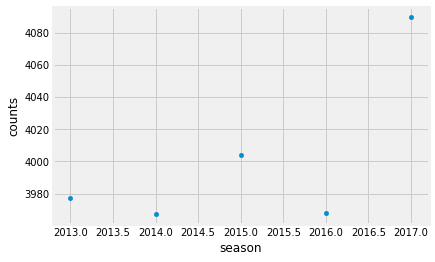

In [17]:
#df_home.query("win == True").groupby(['season', 'home_team']).agg(['count'])
# df_home.query("win == True").groupby('season').win.value_counts()
#df_home.plot(x='season', y=df_home.query("win == True").groupby('season').win.value_counts(), kind='scatter')
df_home_wins = df_home.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_wins.plot(y='counts', x='season', kind='scatter')

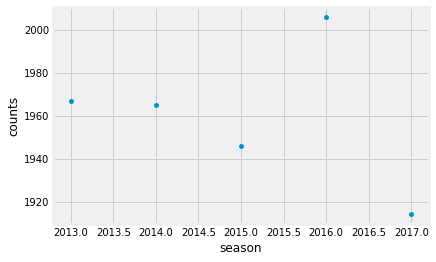

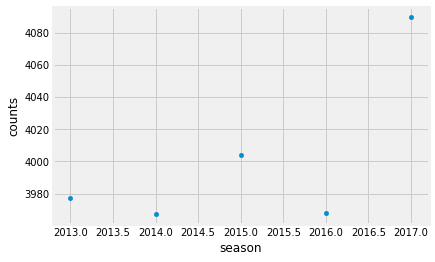

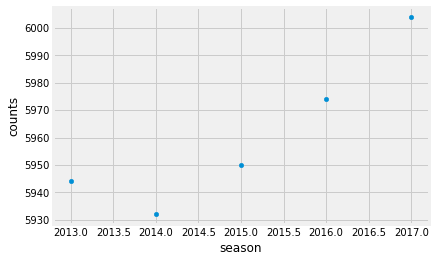

In [18]:
df_road_wins = df_road.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_road_wins.plot(y='counts', x='season', kind='scatter')

df_home_wins = df_home.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_wins.plot(y='counts', x='season', kind='scatter')

df_home_road_wins = df_home_road.query("win == True").groupby('season').win.value_counts().reset_index(name='counts').copy()
df_home_road_wins.plot(y='counts', x='season', kind='scatter')

In [19]:
print(df_home_wins.head())
print(df_road_wins.head())
print(df_home_road_wins.head())

   season   win  counts
0    2013  True    3977
1    2014  True    3967
2    2015  True    4004
3    2016  True    3968
4    2017  True    4090
   season   win  counts
0    2013  True    1967
1    2014  True    1965
2    2015  True    1946
3    2016  True    2006
4    2017  True    1914
   season   win  counts
0    2013  True    5944
1    2014  True    5932
2    2015  True    5950
3    2016  True    5974
4    2017  True    6004


No handles with labels found to put in legend.


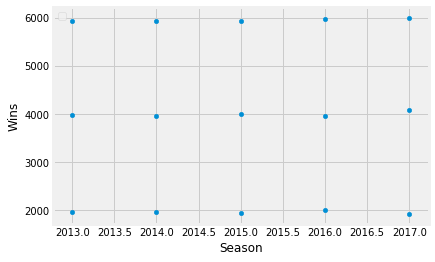

In [20]:
ax = df_home_wins.plot(y='counts', x='season', kind='scatter')
#df_road_wins.plot(ax=ax)
df_road_wins.plot(y='counts', x='season', kind='scatter', ax=ax)
df_home_road_wins.plot(y='counts', x='season', kind='scatter', ax=ax)
ax.set_ylabel('Wins')
ax.set_xlabel('Season')
ax.legend(loc='upper left')

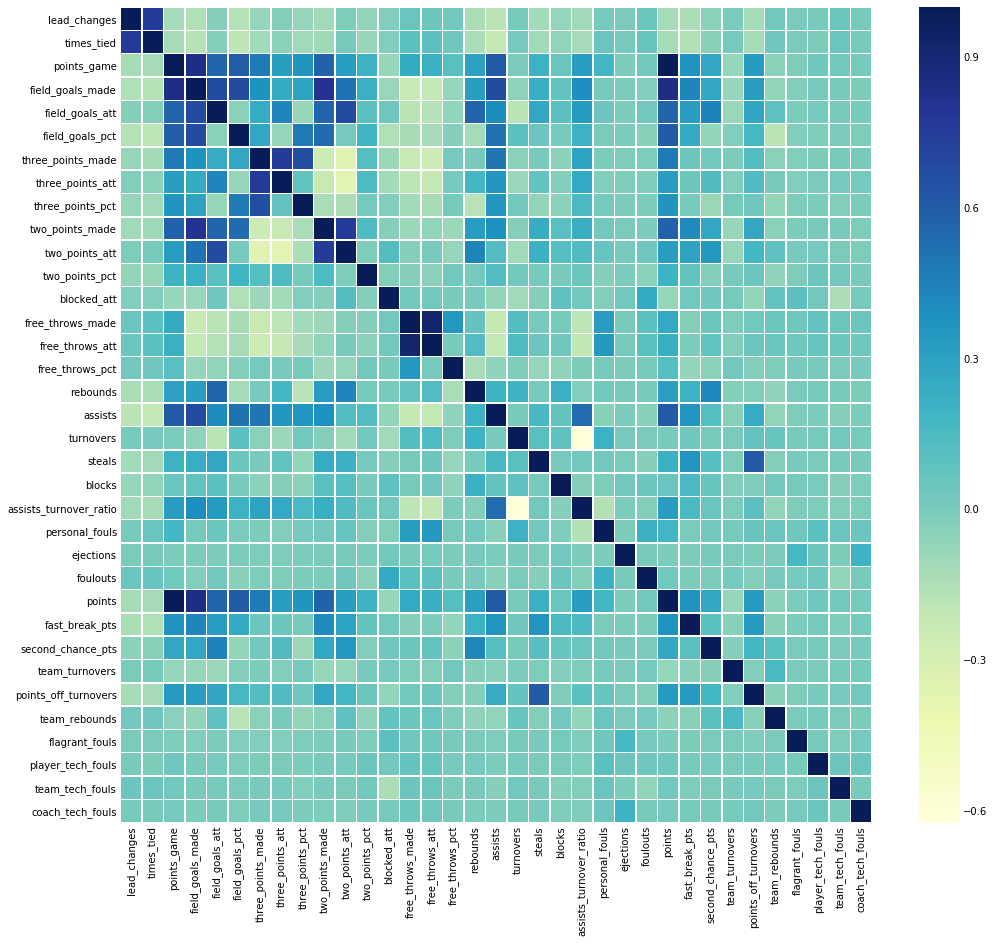

In [21]:
# get the correlation
fig, ax = plt.subplots(figsize=(15,15))
df_home_wins_correlations=''
df_home_wins_correlations = df_home.query("win == True")[['lead_changes', 'win', 'times_tied', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       #'offensive_rebounds', 'defensive_rebounds', 
                                                          'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']].corr();
sns.heatmap(df_home_wins_correlations, linewidths=.5, cmap="YlGnBu");

In [22]:
# lets take a look at the correlation matrix
df_home_wins_correlations.corr()

,lead_changes,times_tied,points_game,field_goals_made,field_goals_att,field_goals_pct,three_points_made,three_points_att,three_points_pct,two_points_made,...,points,fast_break_pts,second_chance_pts,team_turnovers,points_off_turnovers,team_rebounds,flagrant_fouls,player_tech_fouls,team_tech_fouls,coach_tech_fouls
lead_changes,1.000000,0.964682,-0.498449,-0.497281,-0.342842,-0.455113,-0.299597,-0.215581,-0.281645,-0.388098,...,-0.498754,-0.506297,-0.258291,0.062603,-0.432484,0.125302,0.012485,-0.004521,0.099651,0.026019
times_tied,0.964682,1.000000,-0.514882,-0.526516,-0.353725,-0.491328,-0.358358,-0.262893,-0.333304,-0.385705,...,-0.514958,-0.518714,-0.243227,0.068730,-0.439394,0.150880,0.019936,-0.006151,0.107407,0.029592
points_game,-0.498449,-0.514882,1.000000,0.914708,0.686997,0.789022,0.554179,0.418566,0.504299,0.712088,...,0.999940,0.648330,0.400350,-0.364351,0.557764,-0.350910,-0.241004,-0.138248,-0.100854,-0.189518
field_goals_made,-0.497281,-0.526516,0.914708,1.000000,0.807547,0.804992,0.494590,0.384709,0.433643,0.846627,...,0.914344,0.735684,0.445067,-0.328228,0.573283,-0.330245,-0.217555,-0.155036,-0.112808,-0.185898
field_goals_att,-0.342842,-0.353725,0.686997,0.807547,1.000000,0.300402,0.292099,0.440926,0.012144,0.749418,...,0.687670,0.635516,0.705977,-0.327361,0.494937,-0.104502,-0.190695,-0.130168,-0.108989,-0.170587
field_goals_pct,-0.455113,-0.491328,0.789022,0.804992,0.300402,1.000000,0.507727,0.178401,0.692842,0.614409,...,0.787905,0.541417,0.009778,-0.205573,0.421665,-0.428490,-0.161405,-0.121027,-0.074666,-0.129351
three_points_made,-0.299597,-0.358358,0.554179,0.494590,0.292099,0.507727,1.000000,0.864129,0.812942,-0.043803,...,0.552087,0.158202,-0.008152,-0.101053,0.230393,-0.258349,-0.155318,-0.119095,-0.067695,-0.094942
three_points_att,-0.215581,-0.262893,0.418566,0.384709,0.440926,0.178401,0.864129,1.000000,0.410640,-0.086910,...,0.416988,0.138740,0.174360,-0.102503,0.234913,-0.144970,-0.141557,-0.096131,-0.036276,-0.067699
three_points_pct,-0.281645,-0.333304,0.504299,0.433643,0.012144,0.692842,0.812942,0.410640,1.000000,0.000680,...,0.502472,0.106745,-0.214058,-0.063844,0.134047,-0.293884,-0.115938,-0.104351,-0.082257,-0.092395
two_points_made,-0.388098,-0.385705,0.712088,0.846627,0.749418,0.614409,-0.043803,-0.086910,0.000680,1.000000,...,0.712951,0.748493,0.516679,-0.315315,0.517864,-0.221338,-0.154985,-0.105305,-0.088222,-0.155593


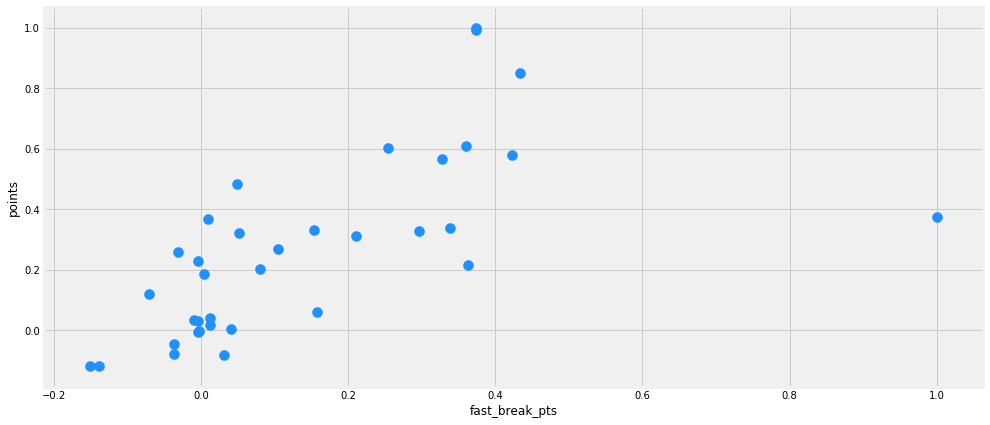

In [23]:
#df_home_wins_correlations.plot(x='assists', y='points', kind='scatter', 
#           color='dodgerblue', figsize=(15,7), s=100);

df_home_wins_correlations.plot(x='fast_break_pts', y='points', kind='scatter', 
           color='dodgerblue', figsize=(15,7), s=100);

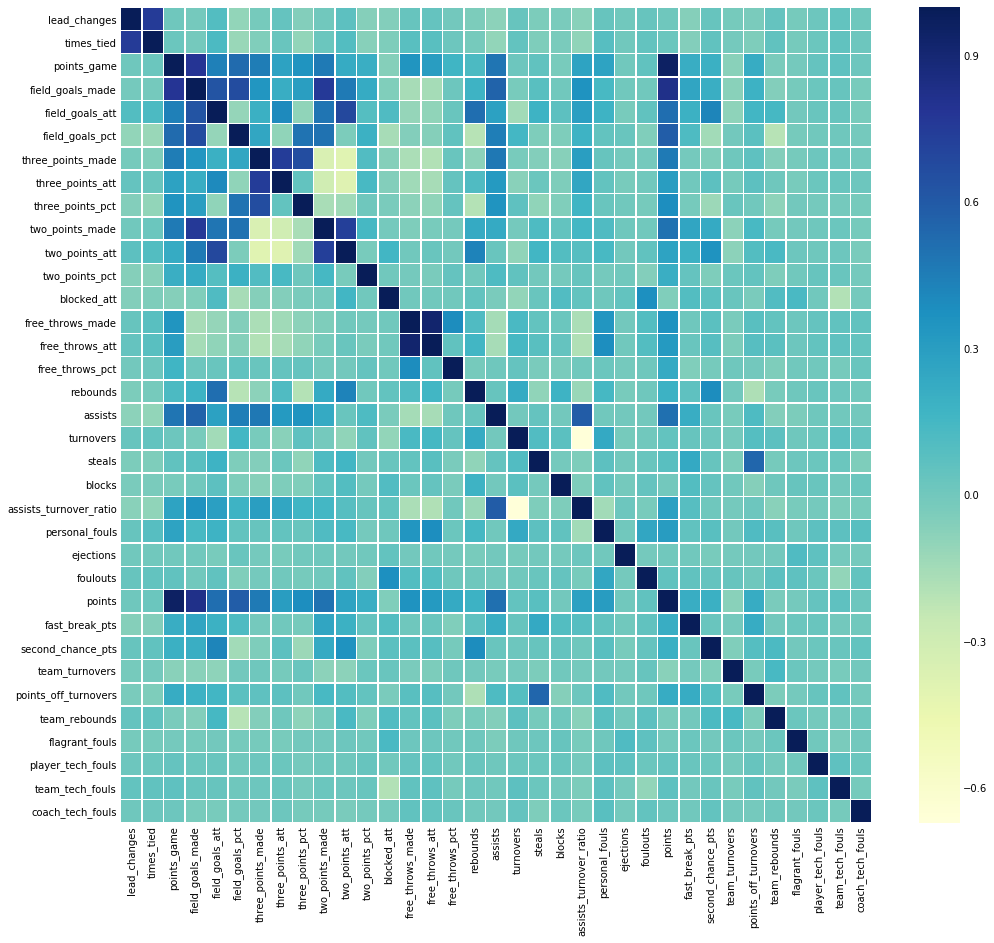

In [24]:
# get the correlation - road wins
fig, ax = plt.subplots(figsize=(15,15))
df_road_wins_correlations=''
df_road_wins_correlations = df_road.query("win == True")[['lead_changes', 'win', 'times_tied', 'points_game',
#df_road_wins_correlations = df_road[['lead_changes', 'win', 'times_tied', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       #'offensive_rebounds', 'defensive_rebounds', 
                                                          'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']].corr();
sns.heatmap(df_road_wins_correlations, linewidths=.5, cmap="YlGnBu");

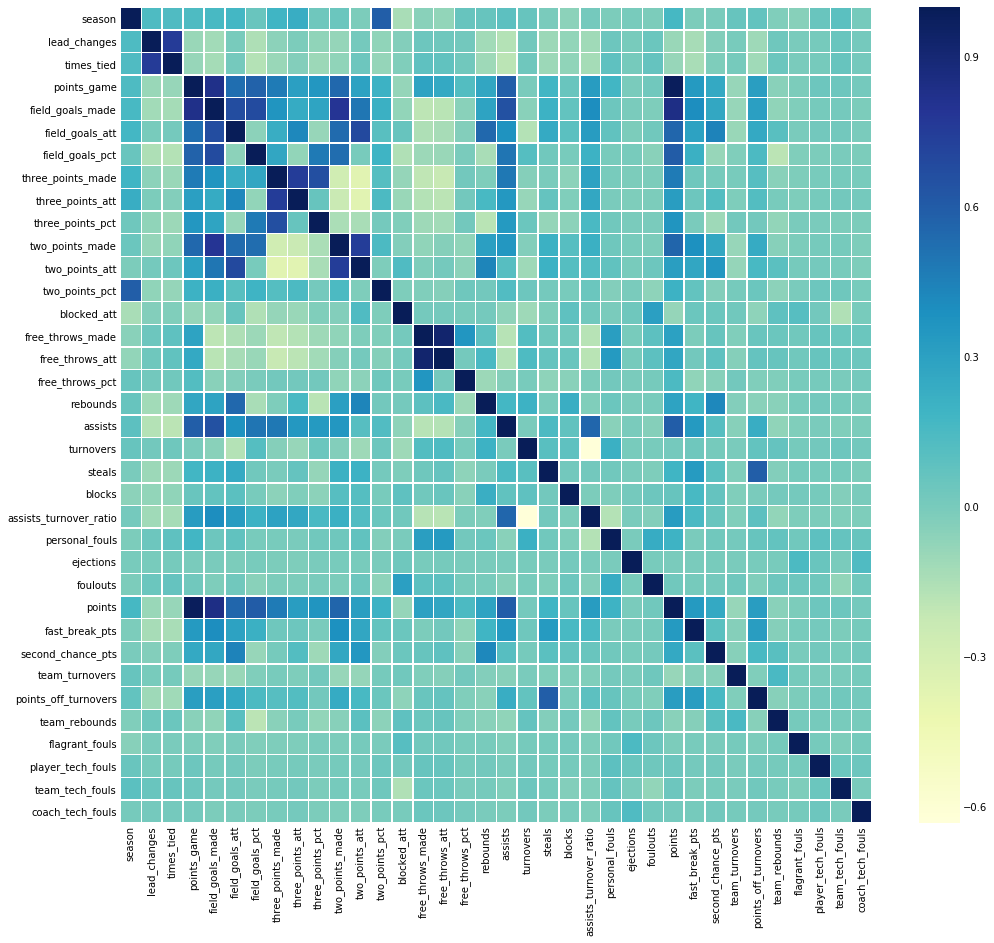

In [25]:
# get the correlation - home/road wins
fig, ax = plt.subplots(figsize=(15,15))
df_home_road_wins_correlations=''
df_home_road_wins_correlations = df_home_road.query("win == True")[['season','lead_changes', 'win', 'times_tied', 'points_game',
       'minutes', 'field_goals_made', 'field_goals_att', 'field_goals_pct',
       'three_points_made', 'three_points_att', 'three_points_pct',
       'two_points_made', 'two_points_att', 'two_points_pct', 'blocked_att',
       'free_throws_made', 'free_throws_att', 'free_throws_pct',
       #'offensive_rebounds', 'defensive_rebounds', 
                                                          'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']].corr();
sns.heatmap(df_home_road_wins_correlations, linewidths=.5, cmap="YlGnBu");

In [26]:
def distribution_plotter(column, data_set):
    data = data_set[column]
    sns.set(rc={"figure.figsize": (10, 7)})
    sns.set(color_codes=True)
    sns.set(style="white", palette="muted")
    dist = sns.distplot(data, hist_kws={'alpha':0.2}, kde_kws={'linewidth':5})
    dist.set_title('Distribution of ' + column + '\n', fontsize=16)

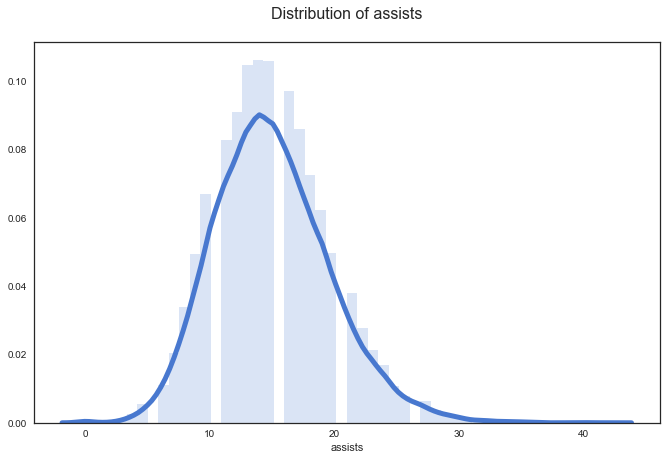

In [27]:
#distribution_plotter('points', df_home_road.query("win == True"))
#df_home_road_wins.describe
#df_home_road.fillna(value=0, axis=1, inplace=True)
#df_home_road.loc[:, df_home_road.isna().any()]
df_home_road_filtered = df_home_road[df_home_road['assists'].notnull()]
distribution_plotter('assists', df_home_road_filtered.query("win == True"))

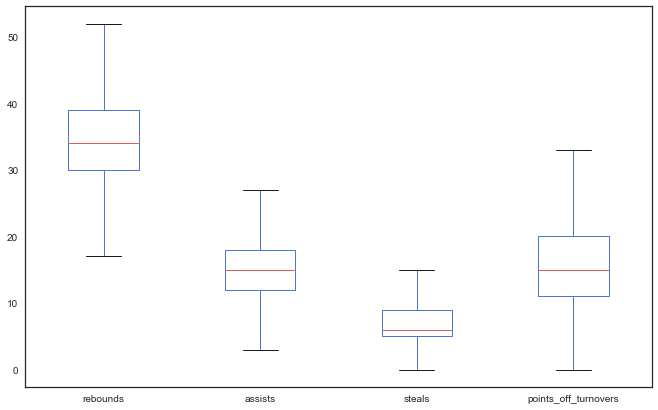

In [28]:
# lets look at the box plots
df_home_road[['rebounds', 'assists', 'steals', 'points_off_turnovers']].plot.box(showfliers=False);

In [29]:
# lets look at the data based on a group by team where win = True
# we'll include the following:
# name, field_goals_made, field_goals_att, three_points_made, three_points_att, two_points_made
# two_points_att, blocked_att, free_throws_made, free_throws_att
# offensive_rebounds, defensive_rebounds, rebounds, assists, turnovers, steals,
# blocks, personal_fouls, points, fast_break_pts, second_chance_pts, team_turnovers,
# points_off_turnovers, team_rebounds
df_groupby_team_wins = ''
df_groupby_team_wins = df.query("win == True")[['name', 'field_goals_made', 'field_goals_att', 'three_points_made', 'three_points_att', 'two_points_made',
    'two_points_att', 'blocked_att', 'free_throws_made', 'free_throws_att', 'offensive_rebounds', 'defensive_rebounds', 
    'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'points', 'fast_break_pts', 'second_chance_pts', 
    'team_turnovers', 'points_off_turnovers', 'team_rebounds']].copy()

df_groupby_team_wins = df_groupby_team_wins.groupby(['name'])['field_goals_made', 'field_goals_att', 'three_points_made', 'three_points_att', 'two_points_made',
    'two_points_att', 'blocked_att', 'free_throws_made', 'free_throws_att', #'offensive_rebounds', 'defensive_rebounds', 
    'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'points', 'fast_break_pts', 'second_chance_pts', 
    'team_turnovers', 'points_off_turnovers', 'team_rebounds'].agg('sum')

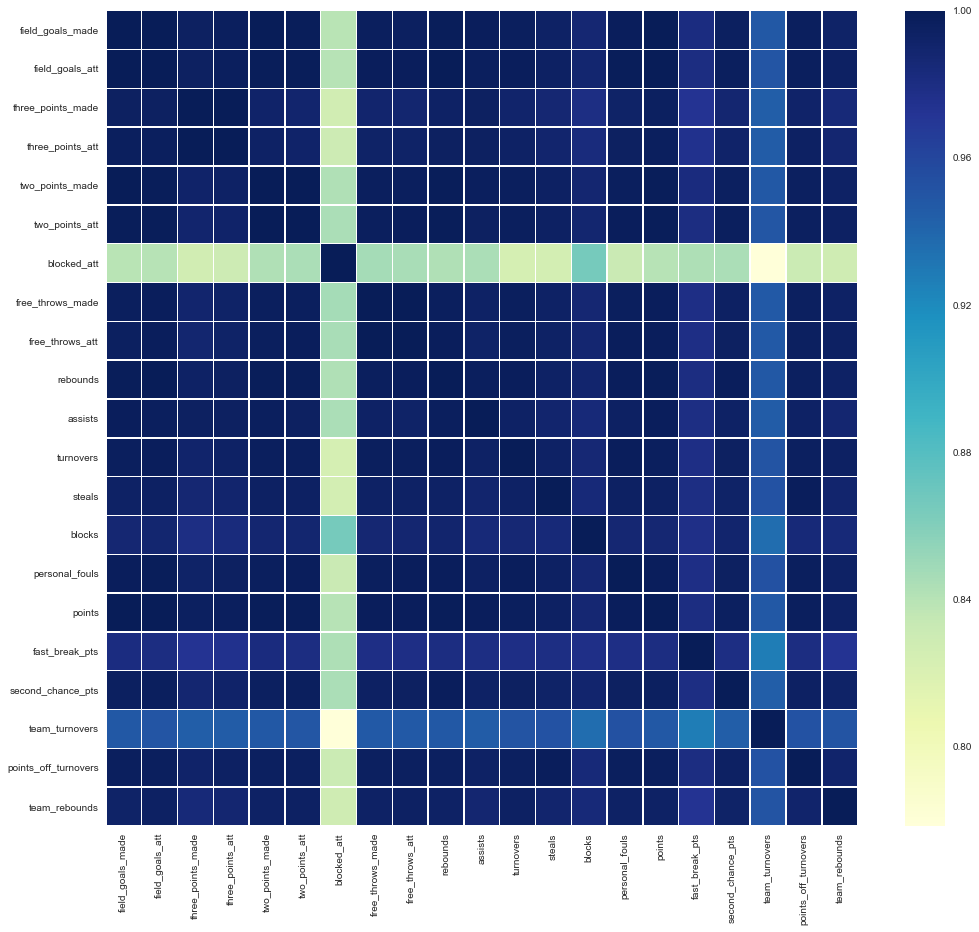

In [30]:
# get the correlation - home/road wins
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df_groupby_team_wins.corr(), linewidths=.5, cmap="YlGnBu")  #, vmax=1.0, vmin=-1.0);

#### Define feature columns

In [69]:
#feature_cols = ['name', 'field_goals_made', 'field_goals_att', 'three_points_made', 'three_points_att', 'two_points_made',
#    'two_points_att', 'blocked_att', 'free_throws_made', 'free_throws_att', 'offensive_rebounds', 'defensive_rebounds', 
#    'rebounds', 'assists', 'turnovers', 'steals', 'blocks', 'personal_fouls', 'points', 'fast_break_pts', 'second_chance_pts', 
#    'team_turnovers', 'points_off_turnovers', 'team_rebounds']

# we're going to look at points as our response variable
feature_cols = ['lead_changes', 'times_tied', 'field_goals_made',
       'field_goals_att', 'field_goals_pct', 'three_points_made',
       'three_points_att', 'three_points_pct', 'two_points_made',
       'two_points_att', 'two_points_pct', 'blocked_att', 'free_throws_made',
       'free_throws_att', 'free_throws_pct', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls']

In [68]:
df_home_wins_correlations.head()
df_home_wins_correlations.columns

Index(['lead_changes', 'times_tied', 'points_game', 'field_goals_made',
       'field_goals_att', 'field_goals_pct', 'three_points_made',
       'three_points_att', 'three_points_pct', 'two_points_made',
       'two_points_att', 'two_points_pct', 'blocked_att', 'free_throws_made',
       'free_throws_att', 'free_throws_pct', 'rebounds', 'assists',
       'turnovers', 'steals', 'blocks', 'assists_turnover_ratio',
       'personal_fouls', 'ejections', 'foulouts', 'points', 'fast_break_pts',
       'second_chance_pts', 'team_turnovers', 'points_off_turnovers',
       'team_rebounds', 'flagrant_fouls', 'player_tech_fouls',
       'team_tech_fouls', 'coach_tech_fouls'],
      dtype='object')

In [70]:
# Create X and y.
X = df_home_wins_correlations[feature_cols]
y = df_home_wins_correlations.points

# Import, instantiate, fit.
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [71]:
# Print the coefficients.
print(linreg.intercept_)
print(linreg.coef_)

8.881784197001252e-16
[ 1.52684733e-14 -2.38697950e-14 -3.90313754e-11 -1.35870537e-10
  1.98063788e-13  2.21883206e-11  1.05776776e-10 -3.58740815e-15
  3.51367754e-11  1.31456949e-10  8.86790641e-15 -3.81361609e-14
 -1.12751475e-12 -2.27595720e-15  1.44051437e-14 -2.26693664e-14
 -6.65717481e-14 -2.01227923e-15 -8.24826318e-14 -3.52287644e-14
  1.67227343e-14  4.13558077e-15 -2.74086309e-15  4.35762537e-14
  1.00000000e+00  3.51288443e-13  7.28635902e-14 -7.04991621e-14
 -3.90659727e-15  3.89029087e-14  3.63598041e-15 -2.38697950e-15
 -1.45369827e-14 -3.85455556e-14]


C:\Users\Admin\Anaconda3\lib\site-packages\matplotlib\pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


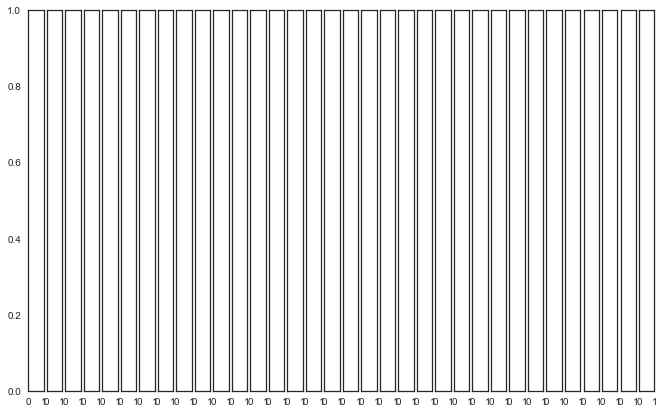

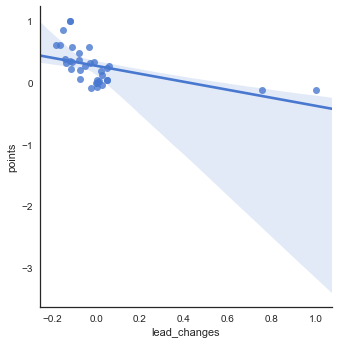

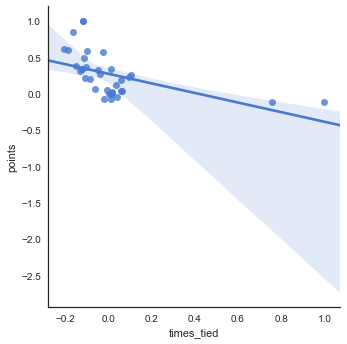

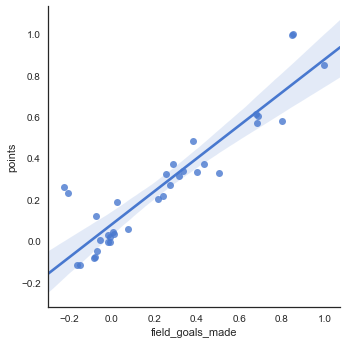

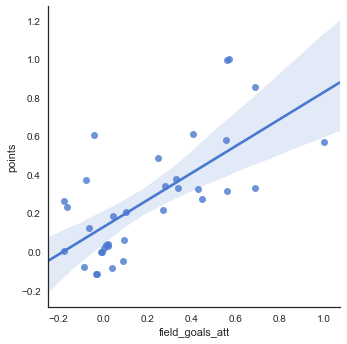

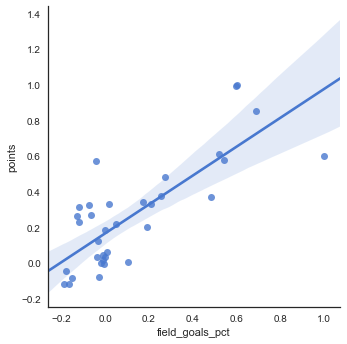

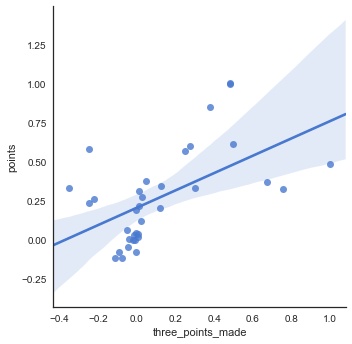

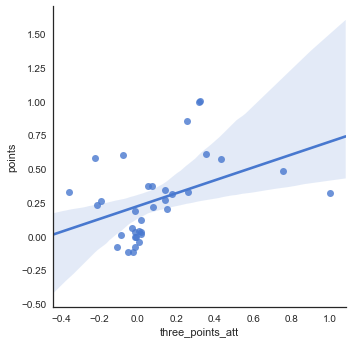

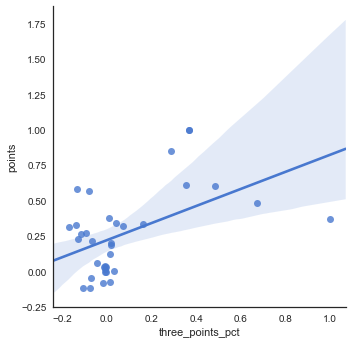

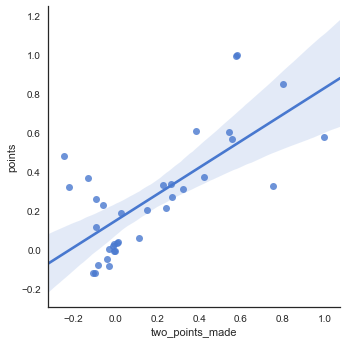

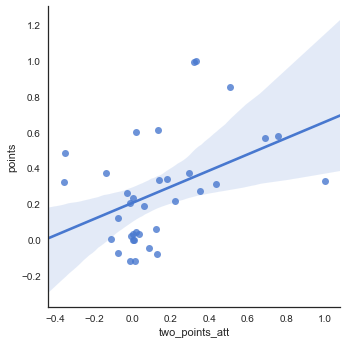

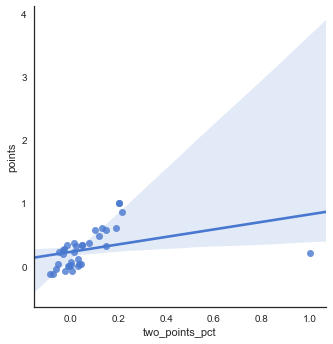

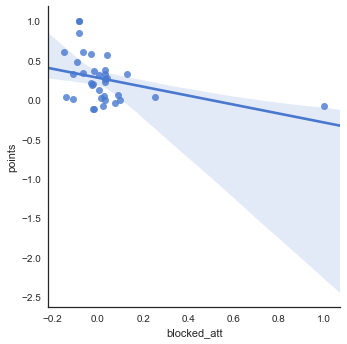

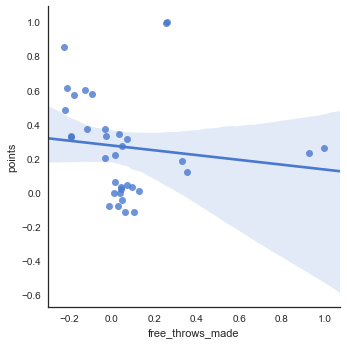

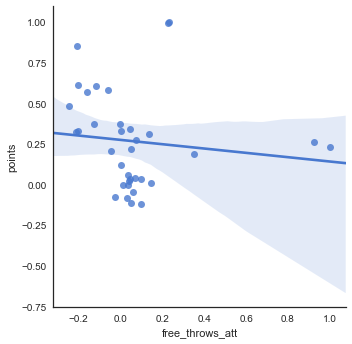

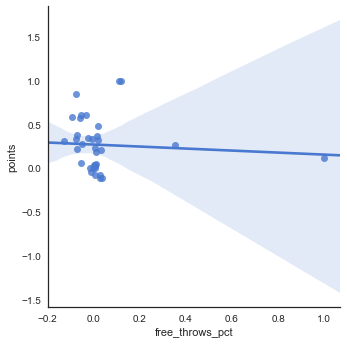

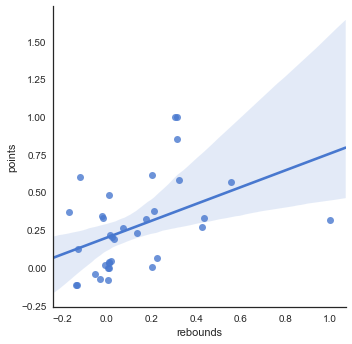

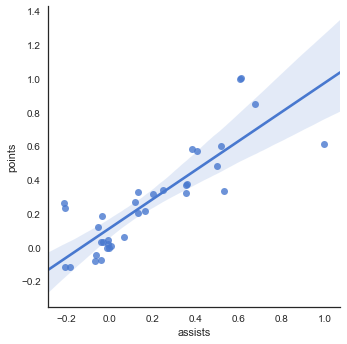

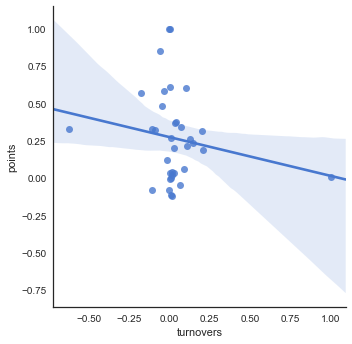

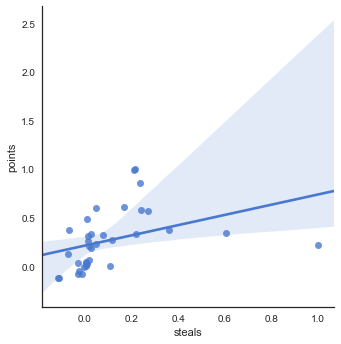

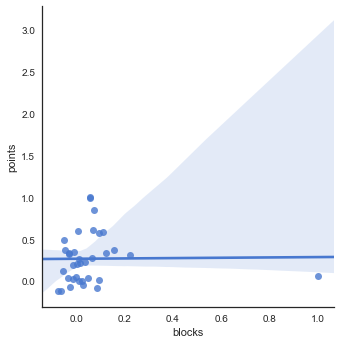

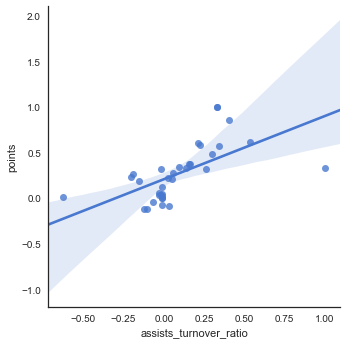

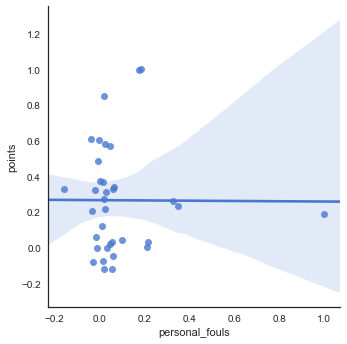

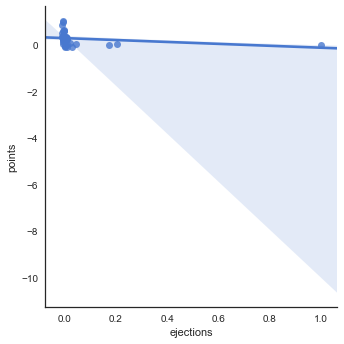

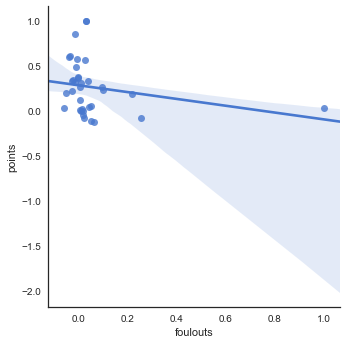

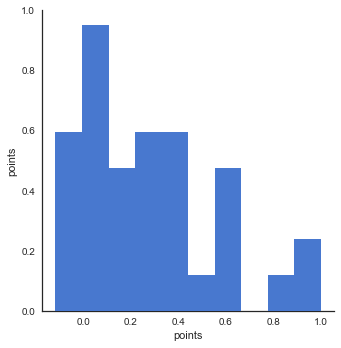

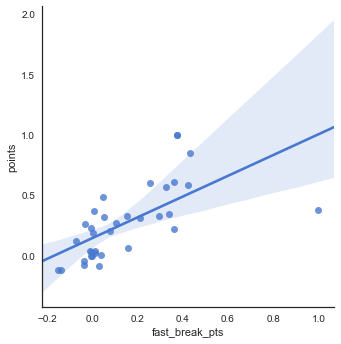

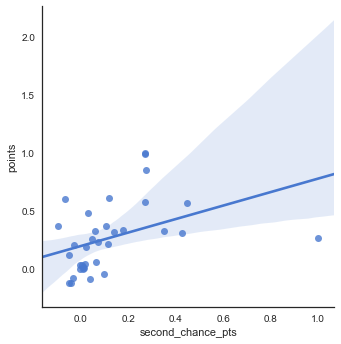

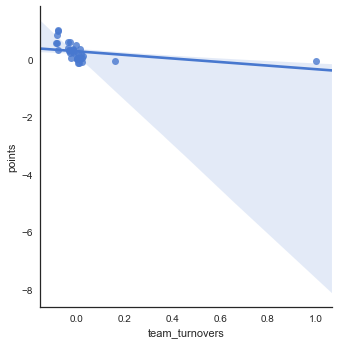

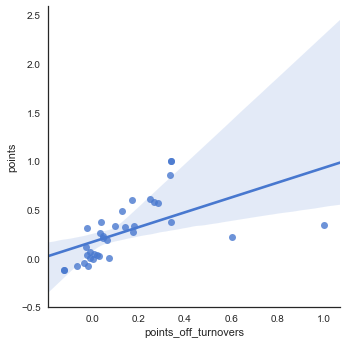

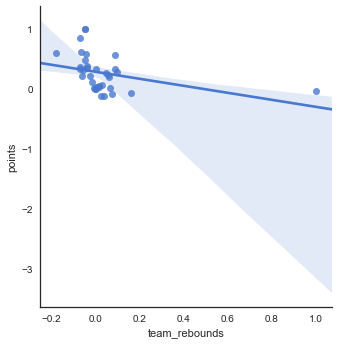

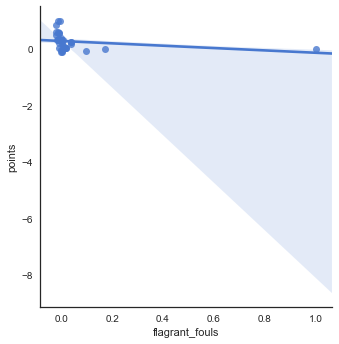

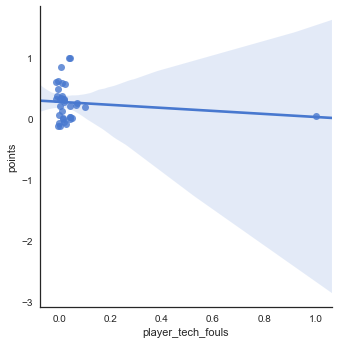

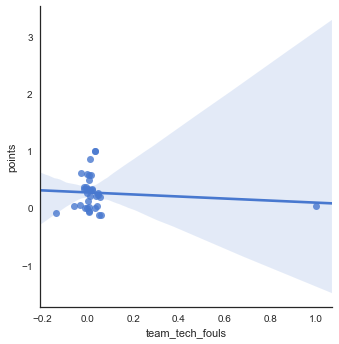

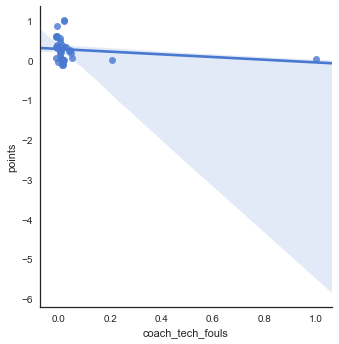

In [73]:

fig, axs = plt.subplots(1, len(feature_cols), sharey=True)
for index, feature in enumerate(feature_cols):
    #df_home_wins_correlations.plot(kind='scatter', x=feature, y='points', ax=axs[index], figsize=(16, 3))
    sns.pairplot(df_home_wins_correlations, x_vars=feature_cols[index], y_vars='points', kind='reg', dropna=True, size=5);